In [1]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from keras.preprocessing.image import img_to_array
from vis.utils import utils

Using TensorFlow backend.
c:\users\svetislavsimic\anaconda3\envs\a\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\svetislavsimic\anaconda3\envs\a\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\svetislavsimic\anaconda3\envs\a\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\svetislavsimic\anaconda

In [70]:
from keras.models import model_from_json, Model
from keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Dropout

MODEL_NAME = 'model_c3'

def load_regression_model():
    
    model_json_file = open(f'../neuronske_mreze/end_to_end_encoding/regression_model_one_piece_{MODEL_NAME}.json', 'r')
    loaded_model_json = model_json_file.read()
    model_json_file.close()
    regression_model = model_from_json(loaded_model_json)
    regression_model.load_weights(f"../neuronske_mreze/end_to_end_encoding/regression_model_weights_one_piece_{MODEL_NAME}.h5")
    print("Regression model loaded")
    
    return regression_model

def build_regression_model():
    input_img = Input(shape=(256, 256, 3))  

    model = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    model = MaxPooling2D((2, 2), padding='same')(model)
    model = Conv2D(32, (3, 3), activation='relu', padding='same')(model)
    model = MaxPooling2D((2, 2), padding='same')(model)
    model = Conv2D(16, (3, 3), activation='relu', padding='same')(model)
    model = MaxPooling2D((2, 2), padding='same')(model)
    
    # top_input = Input(shape=encoder_output.output_shape[1:])
    
    model = Flatten()(model)
    model = Dense(1024, activation='relu')(model)
    model = Dropout(rate=0.5)(model)
    model = Dense(512, activation='relu')(model)
    model = Dense(1, activation='linear')(model)
    
    regressor = Model(input_img, model, name="regressor")
    
    print("Regression model built")
    
    return regressor

def build_regression_model_2():
    input_img = Input(shape=(256, 256, 3))  

    model = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    model = MaxPooling2D((2, 2), padding='same')(model)
    model = Conv2D(32, (3, 3), activation='relu', padding='same')(model)
    model = MaxPooling2D((2, 2), padding='same')(model)
    model = Conv2D(16, (3, 3), activation='relu', padding='same')(model)
    model = MaxPooling2D((2, 2), padding='same')(model)
    
    # top_input = Input(shape=encoder_output.output_shape[1:])
    
    model = Flatten()(model)
    model = Dense(1024, activation='relu')(model)
    model = Dropout(rate=0.5)(model)
    model = Dense(512, activation='relu')(model)
    model = Dense(1, activation='linear')(model)
    
    regressor = Model(input_img, model, name="regressor")
    
    print("Regression model built")
    
    return regressor 

In [3]:
FRAME_H = 256
FRAME_W = 256

In [4]:
model = load_regression_model()
# model.summary()

# model.layers[1].summary()
# model.layers[2].summary()

input_img = Input(shape=(256, 256, 3))

encoder = model.layers[1]
last_layer_enc = encoder.layers[-1]

top_model = model.layers[2]

top_1 = top_model.layers[1]
top_2 = top_model.layers[2]
top_3 = top_model.layers[3]
top_4 = top_model.layers[4]
top_5 = top_model.layers[5]

# print(top_model.summary())

full_output = top_1(last_layer_enc.output)
full_output = top_2(full_output)
full_output = top_3(full_output)
full_output = top_4(full_output)
full_output = top_5(full_output)

full_model  = Model(encoder.get_input_at(0), full_output)

print(full_model.summary())


Regression model loaded
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None

Predicted 3.6650242805480957


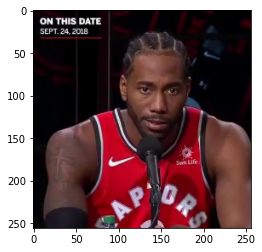

In [177]:
img = utils.load_img('../scraped_database_tags_new/a2WE3Ae.jpg', target_size=(FRAME_H, FRAME_W))
plt.imshow(img)

# Convert to BGR, create input with batch_size: 1.
bgr_img = utils.bgr2rgb(img)
img_input = np.expand_dims(img_to_array(bgr_img), axis=0)
pred = model.predict(img_input)[0][0]
print('Predicted {}'.format(pred))

In [178]:
model = load_regression_model()
# model = build_regression_model()
model.summary()

Regression model loaded
Model: "regressor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 256, 256, 128)     3584      
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 256, 256, 128)     147584    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 128, 128, 64)      73792     
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (Non

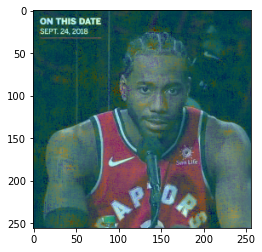

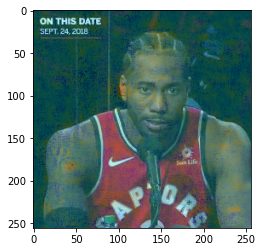

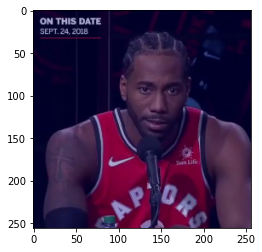

In [179]:
import matplotlib.cm as cm
from vis.visualization import visualize_saliency, overlay

modifiers = [None, 'negate', 'small_values']
for i, modifier in enumerate(modifiers):
    heatmap = visualize_saliency(model, layer_idx=-1, filter_indices=0, 
                                 seed_input=bgr_img, grad_modifier=modifier)
    plt.figure()
    # Overlay is used to alpha blend heatmap onto img.
    jet_heatmap = np.uint8(cm.jet(heatmap)[..., :3] * 255)
    plt.imshow(overlay(img, jet_heatmap, alpha=0.7))

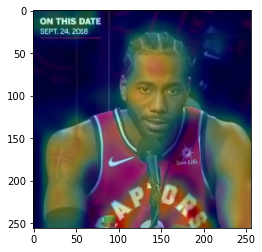

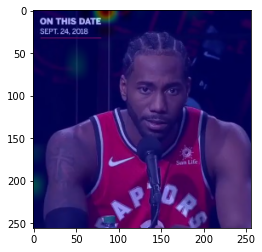

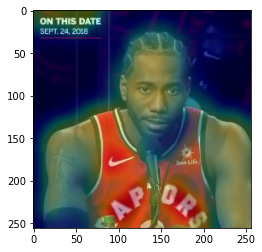

In [180]:
from vis.visualization import visualize_cam

for i, modifier in enumerate(modifiers):
    heatmap = visualize_cam(model, layer_idx=-1, filter_indices=0, 
                            seed_input=bgr_img, grad_modifier=modifier)
    plt.figure()
    # Overlay is used to alpha blend heatmap onto img.
    jet_heatmap = np.uint8(cm.jet(heatmap)[..., :3] * 255)
    plt.imshow(overlay(img, jet_heatmap, alpha=0.7))

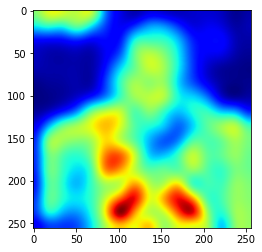

In [181]:
# We want to use grad_modifier='small_values' to see what is resposible for maintaining current prediction.
heatmap = visualize_cam(model, layer_idx=-1, filter_indices=0, 
                        seed_input=bgr_img, grad_modifier='small_values')
jet_heatmap = np.uint8(cm.jet(heatmap)[..., :3] * 255)
plt.imshow(overlay(img, jet_heatmap, alpha=0.0))